### Constru√ß√£o de dashboards utilizando _Streamlit_

Hoje veremos um pouco de uma ferramenta muito √∫til e f√°cil de usar: o Streamlit. Este pacote python permite a cria√ß√£o de p√°ginas web din√¢micas e adapt√°veis com poucas linhas de c√≥digo python, sendo perfeita para o desenvolvimento r√°pido de dashboards, pain√©is de acompanhamento e gr√°ficos interativos. 

√â poss√≠vel coletar inputs dos usu√°rios atrav√©s de elementos padr√£o de formul√°rios (selectbox, campo de texto, checkbox e etc), al√©m de plottar gr√°ficos interativos.

**N√£o conseguiremos utilizar a biblioteca pelo Jupyter Notebook** - precisamos instalar o pacote, criar um arquivo .py e execut√°-lo com o comando `streamlit run arquivo.py` no terminal. Alguns c√≥digos est√£o neste notebook para conveni√™ncia.

A documenta√ß√£o da ferramenta √© extremamente rica e possui exemplos de aplica√ß√£o: https://docs.streamlit.io/develop/api-reference

In [48]:
# Instalando pacotes
!pip install streamlit plotly


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Crie um arquivo `streamlit_dash.py` (ou qualquer outro nome) e insira as seguintes linhas:

```
import streamlit as st
st.write('Ol√°, mundo!')
```

Executando a c√©lula abaixo, uma nova guia ser√° aberta com nossa p√°gina web:

In [53]:
!streamlit run streamlit_dash.py

^C


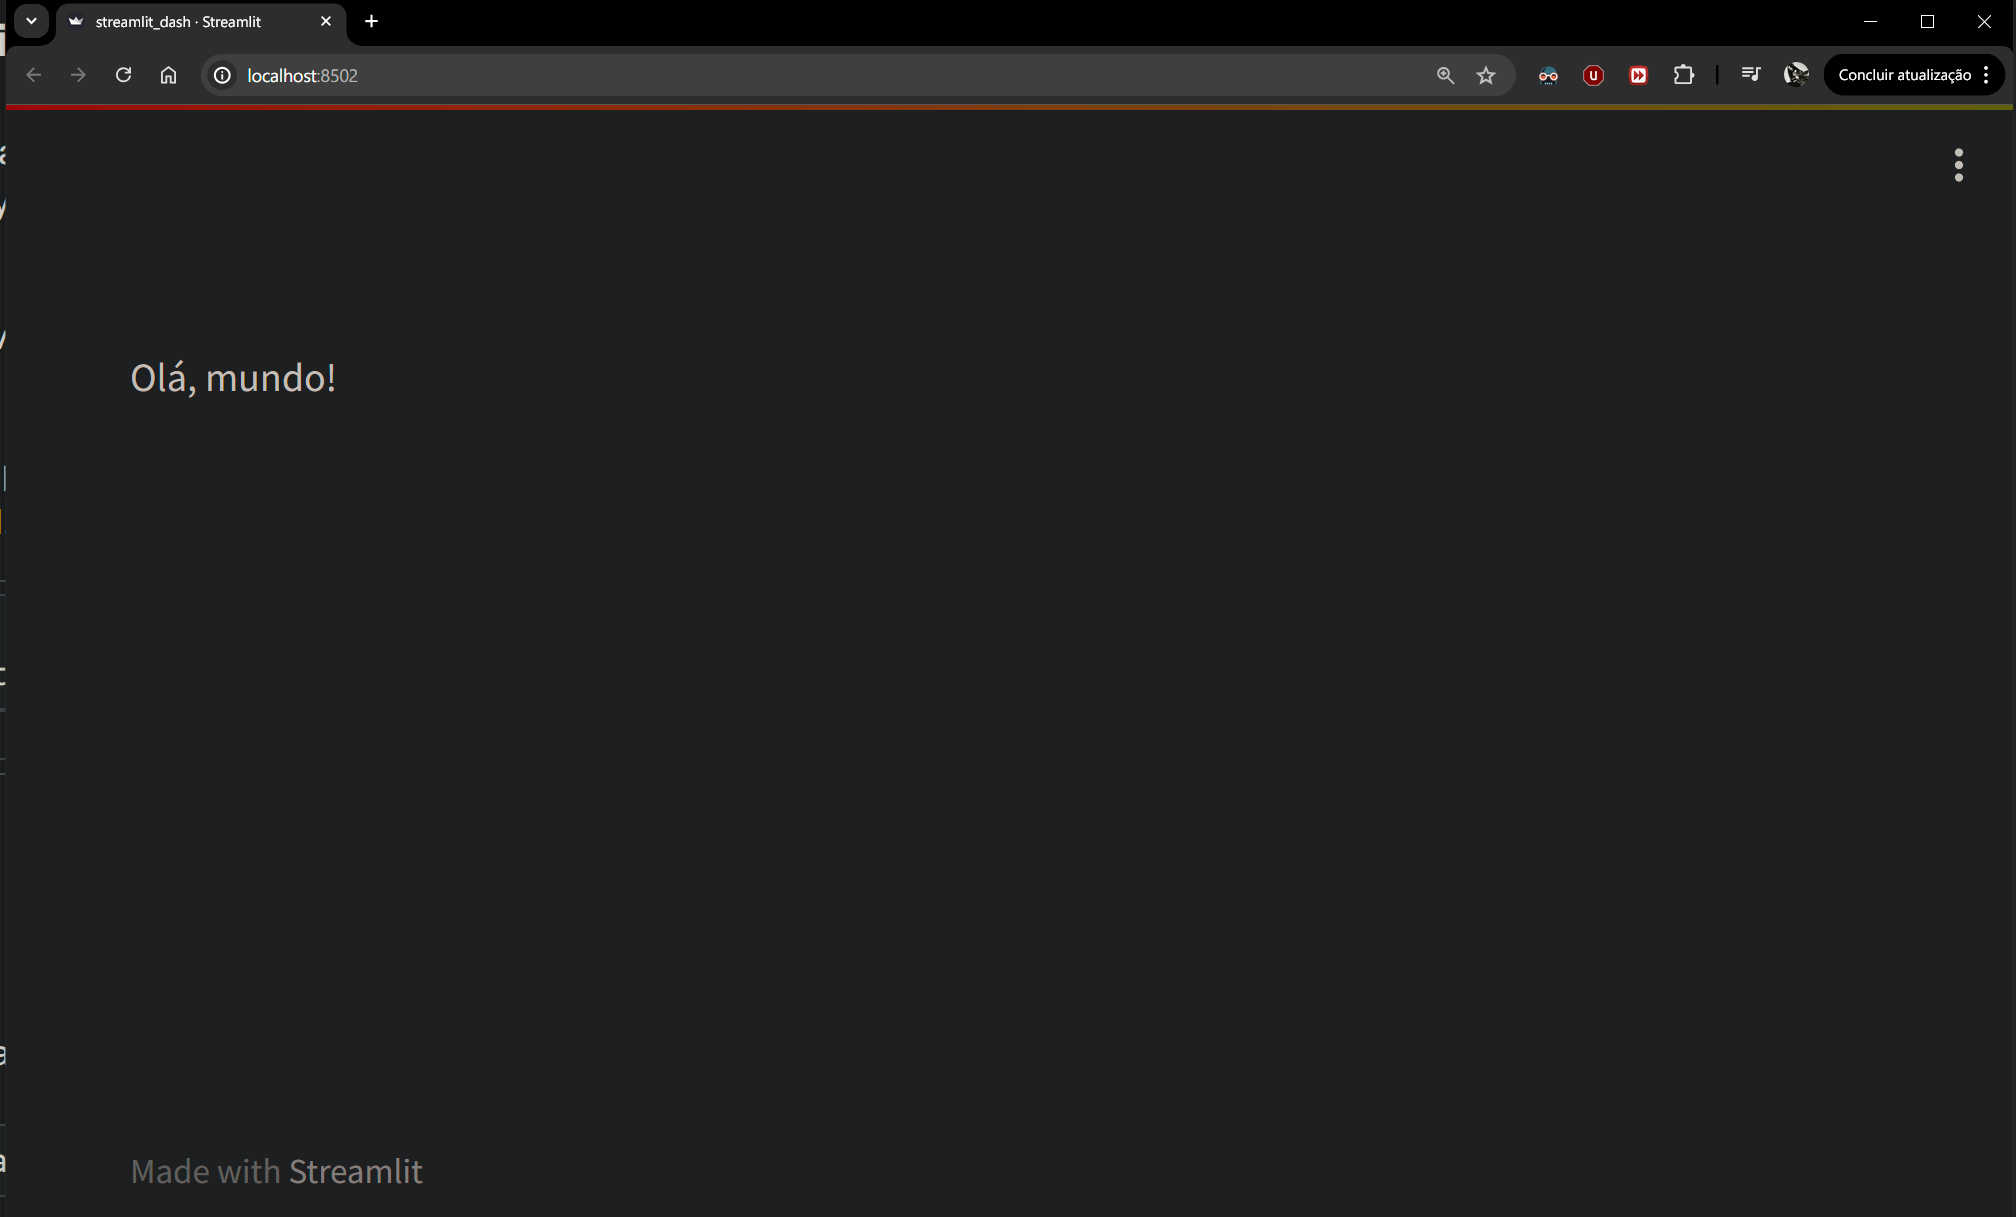

Tamb√©m podemos utilizar fun√ß√µes como `st.header()` ou `st.title()`. Uma outra funcionalidade interessante √© a _sidebar_. Vamos ativ√°-la adicionando as seguintes linhas:

```
st.sidebar.title('Ol√° t√≠tulo da sidebar!')
st.sidebar.write('Ol√° sidebar!')
```



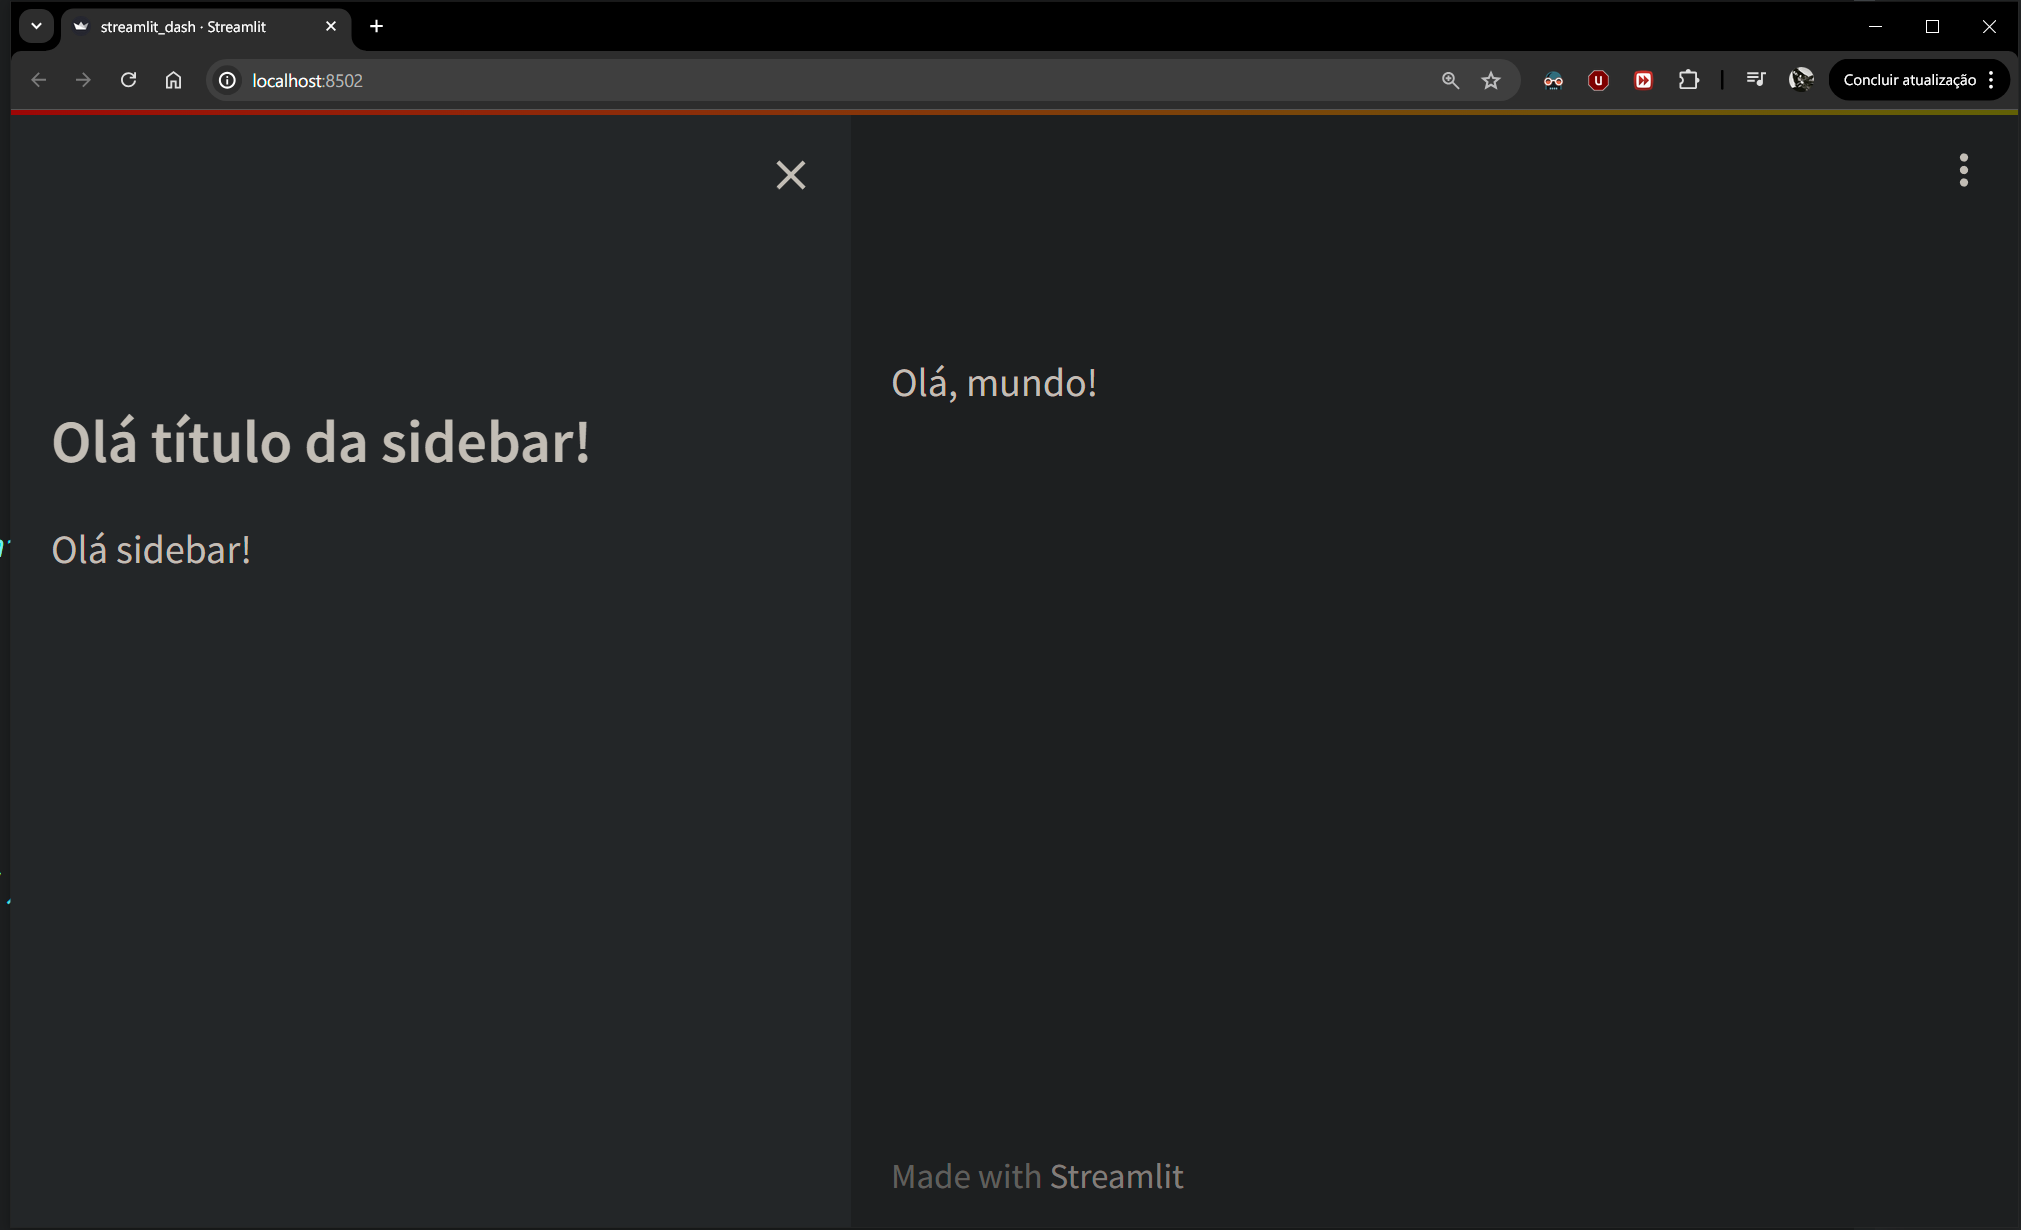

Fazendo mais algumas configura√ß√µes:

```
st.set_page_config(
   page_title='Dashboard',
   page_icon='üßÆ',
   layout='wide',
   initial_sidebar_state='expanded',
)

```

Note que esta configura√ß√£o precisa ser chamada antes de qualquer escrita.

Para recuperar o valor de um campo, basta atribu√≠-lo a uma vari√°vel:

```
col_x = st.selectbox(label='Eixo x', options=df.columns)
col_y = st.selectbox(label='Eixo y', options=df.columns)
```

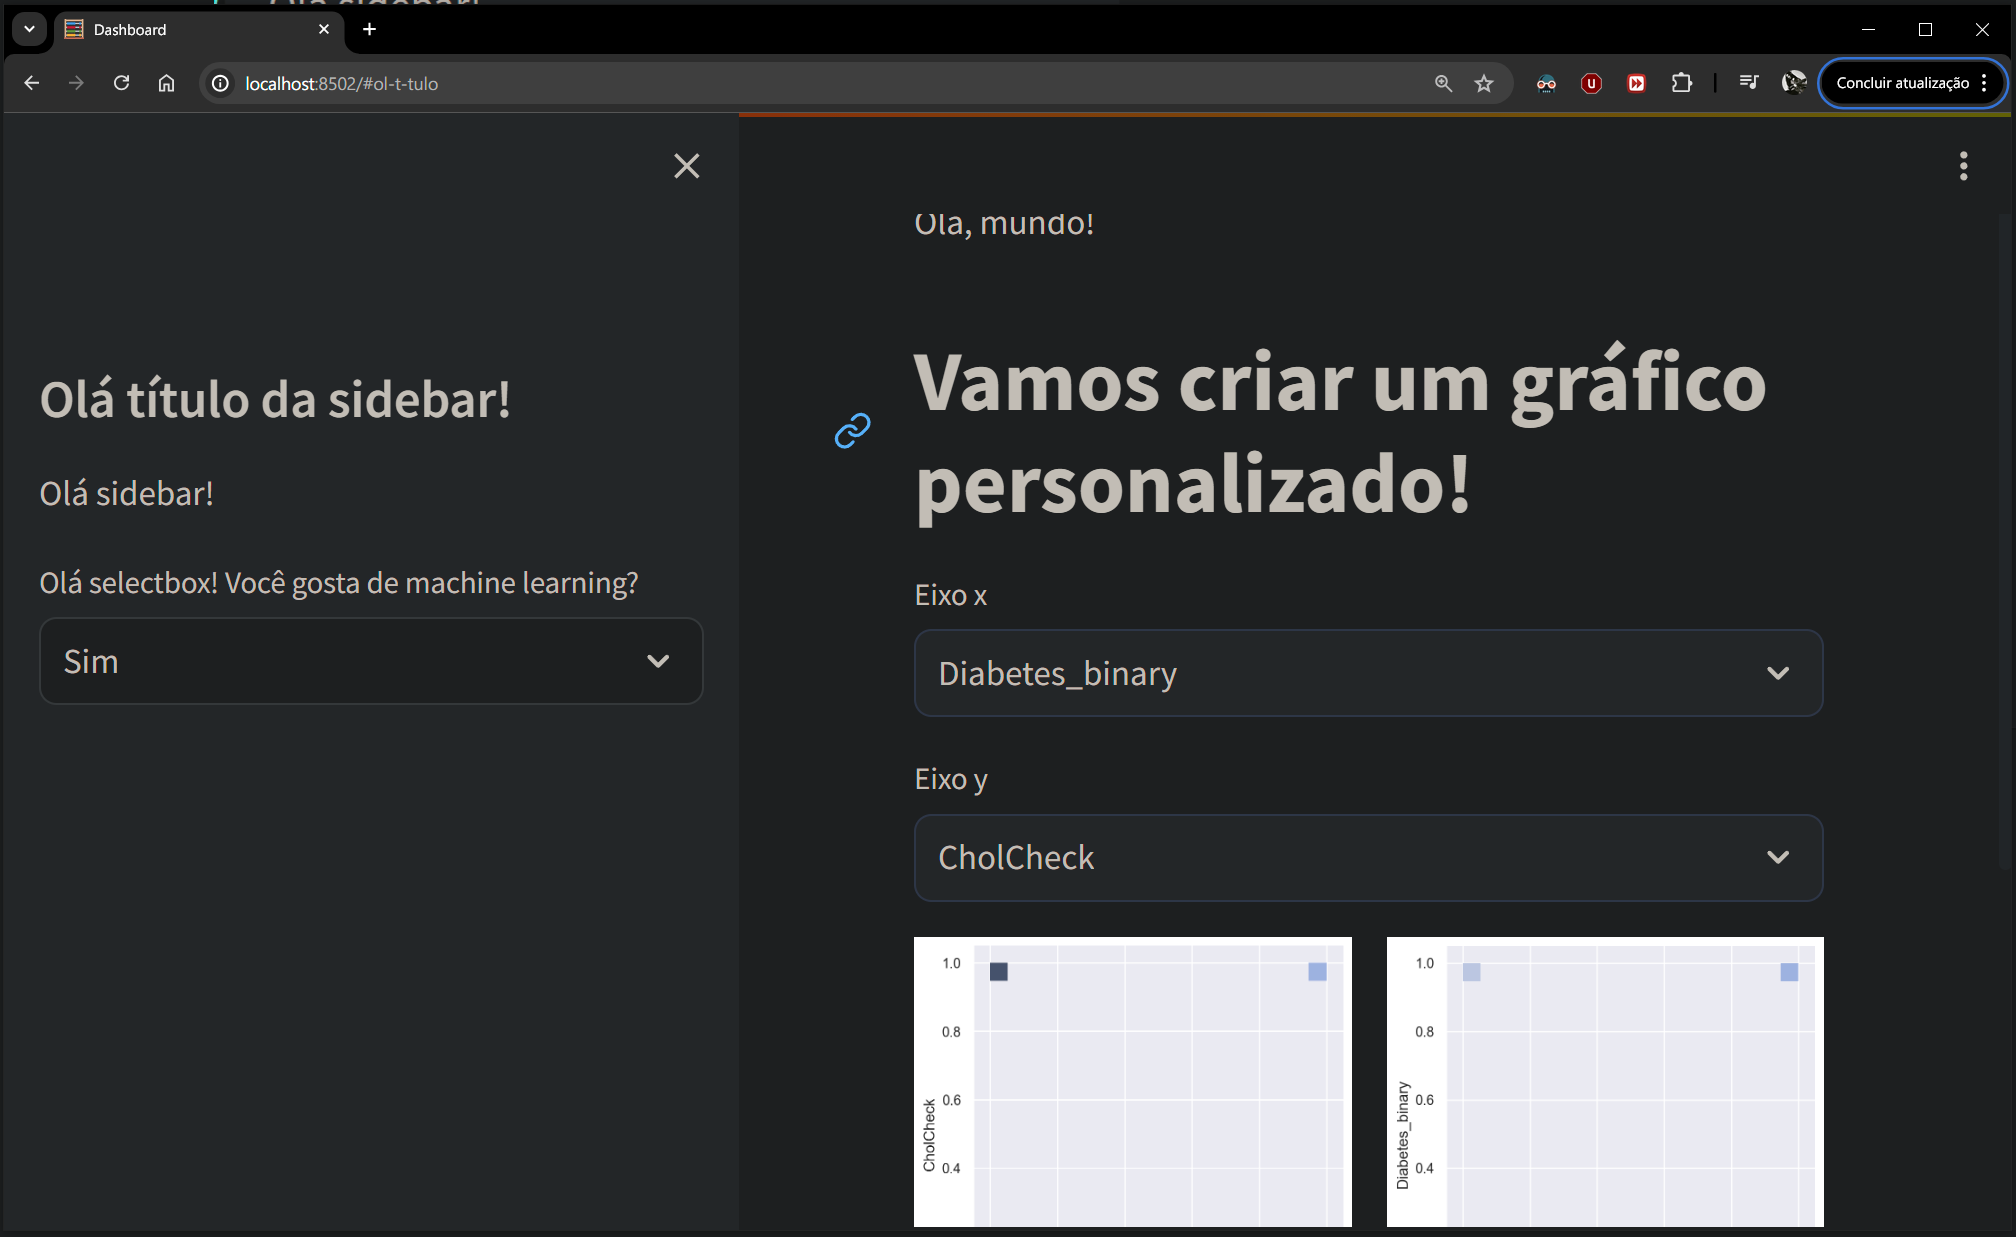

A biblioteca pode ser manipulada em n√≠vel mais baixo, e suporta v√°rias formas de otimiza√ß√£o como caches e atualiza√ß√£o parcial.

In [55]:
df = pd.read_csv('microdados_enem_2018.csv', sep=';', encoding='latin')

In [84]:
df_sampled = df.query('NU_NOTA_MT > 0 and NU_NOTA_CN > 0 and NU_NOTA_REDACAO > 0').sample(frac=0.01)

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

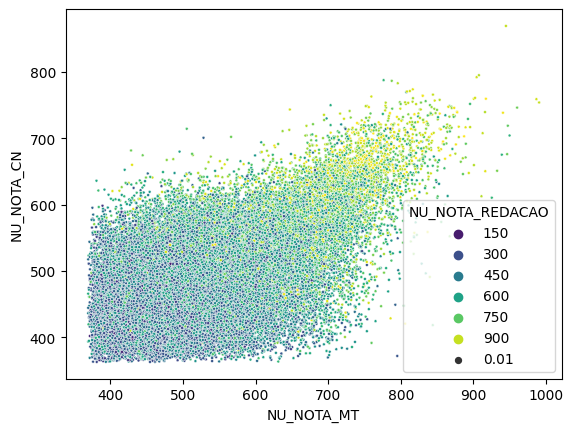

In [87]:
sns.scatterplot(x=df_sampled['NU_NOTA_MT'], y=df_sampled['NU_NOTA_CN'], size=0.01, marker='.',
               hue=df_sampled['NU_NOTA_REDACAO'], palette='viridis')

<Axes: >

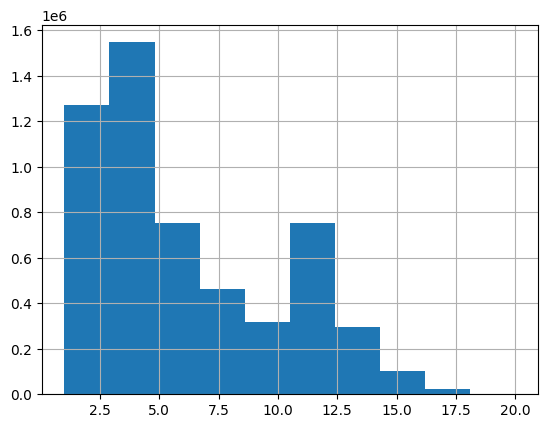

In [79]:
df['TP_FAIXA_ETARIA'].hist()

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='NU_NOTA_REDACAO'>

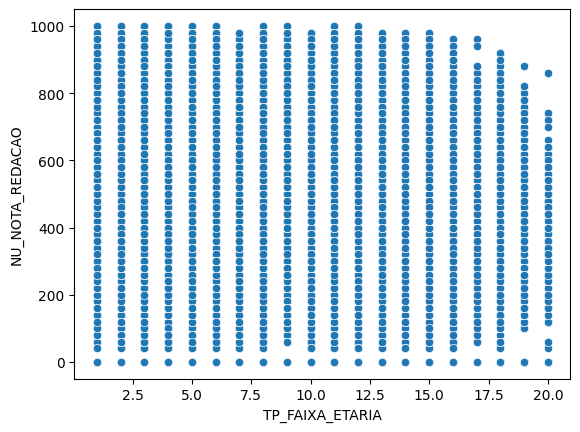

In [71]:
sns.scatterplot(x=df_sampled['TP_FAIXA_ETARIA'], y=df_sampled['NU_NOTA_REDACAO'])